# GeoBench DynamicEarthNet

In [1]:
import os
from pathlib import Path

import torch

from geobench_v2.datamodules import GeoBenchDynamicEarthNetDataModule
from geobench_v2.datasets import GeoBenchDynamicEarthNet
from geobench_v2.datasets.normalization import SatMAENormalizer, ZScoreNormalizer
from geobench_v2.datasets.visualization_util import (
    compute_batch_histograms,
    plot_batch_histograms,
    plot_channel_histograms,
    visualize_segmentation_target_statistics,
)

# %load_ext autoreload
# %autoreload 2

In [2]:
PROJECT_ROOT = Path("/home/nils/projects/GEO-Bench-2/data/dynamic_earthnet")

In [3]:
band_order = GeoBenchDynamicEarthNet.band_default_order

datamodule = GeoBenchDynamicEarthNetDataModule(
    img_size=256,
    batch_size=16,
    num_workers=4,
    # root=PROJECT_ROOT / "data" / "dynamic_earthnet",
    root="/home/nils/projects/GEO-Bench-2/data/dynamic_earthnet",
    band_order=band_order,
    temporal_setting="weekly",
    data_normalizer=torch.nn.Identity(),  # we do custom normalization in the tutorial
)
datamodule.setup("fit")

Using provided pre-initialized normalizer instance: Identity
Using provided pre-initialized normalizer instance: Identity


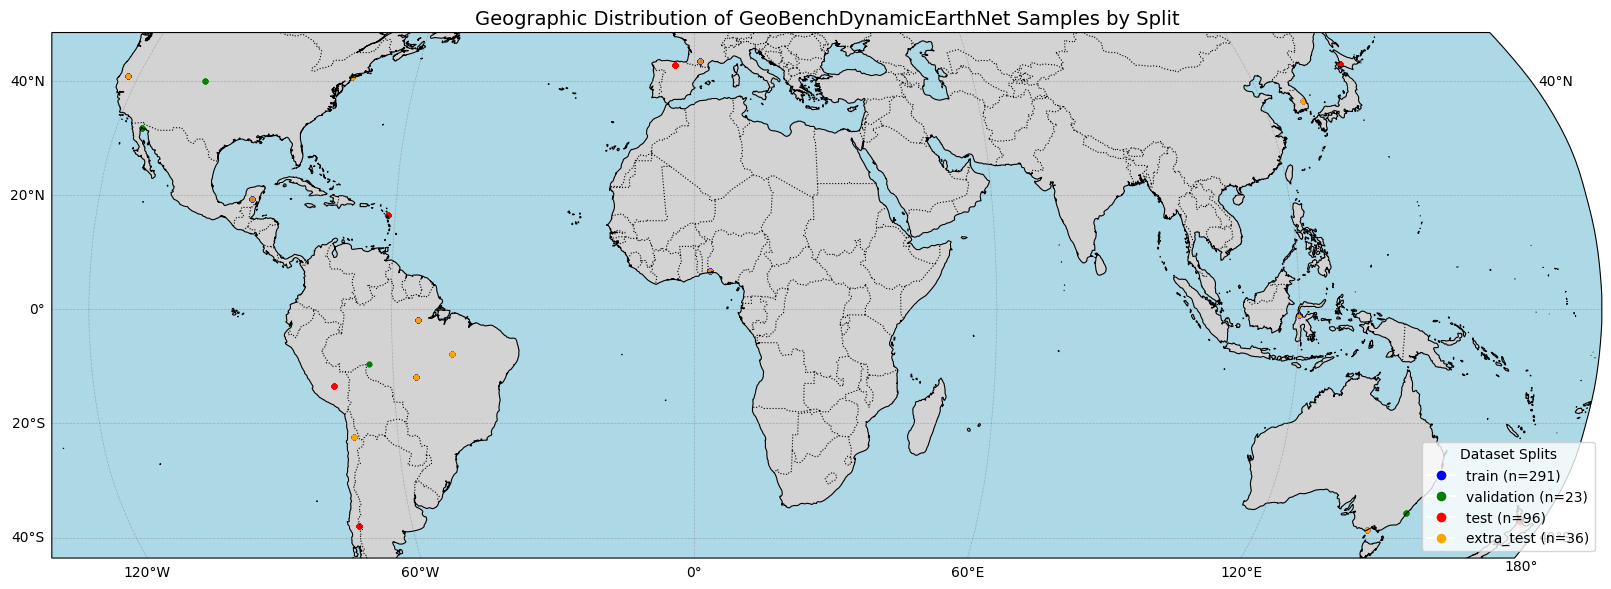

In [4]:
sample_dist_fig = datamodule.visualize_geospatial_distribution()

### Raw Image Statistics

Computed over the training dataset.

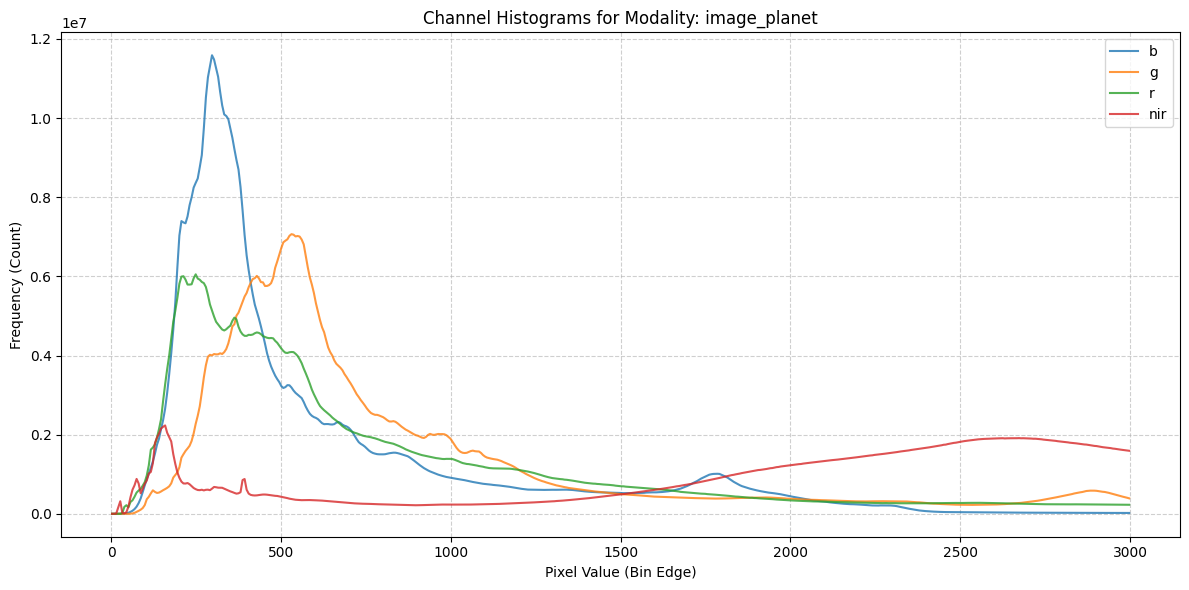

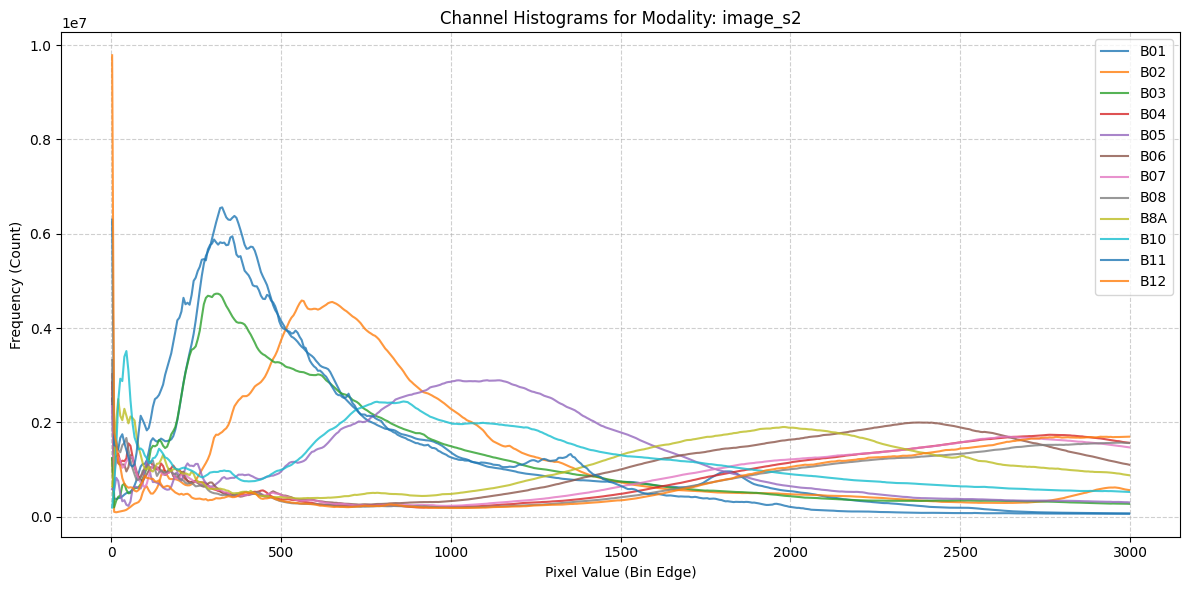

In [5]:
fig = plot_channel_histograms(PROJECT_ROOT / "dynamic_earthnet_stats_satmae.json")

## Target Statistics

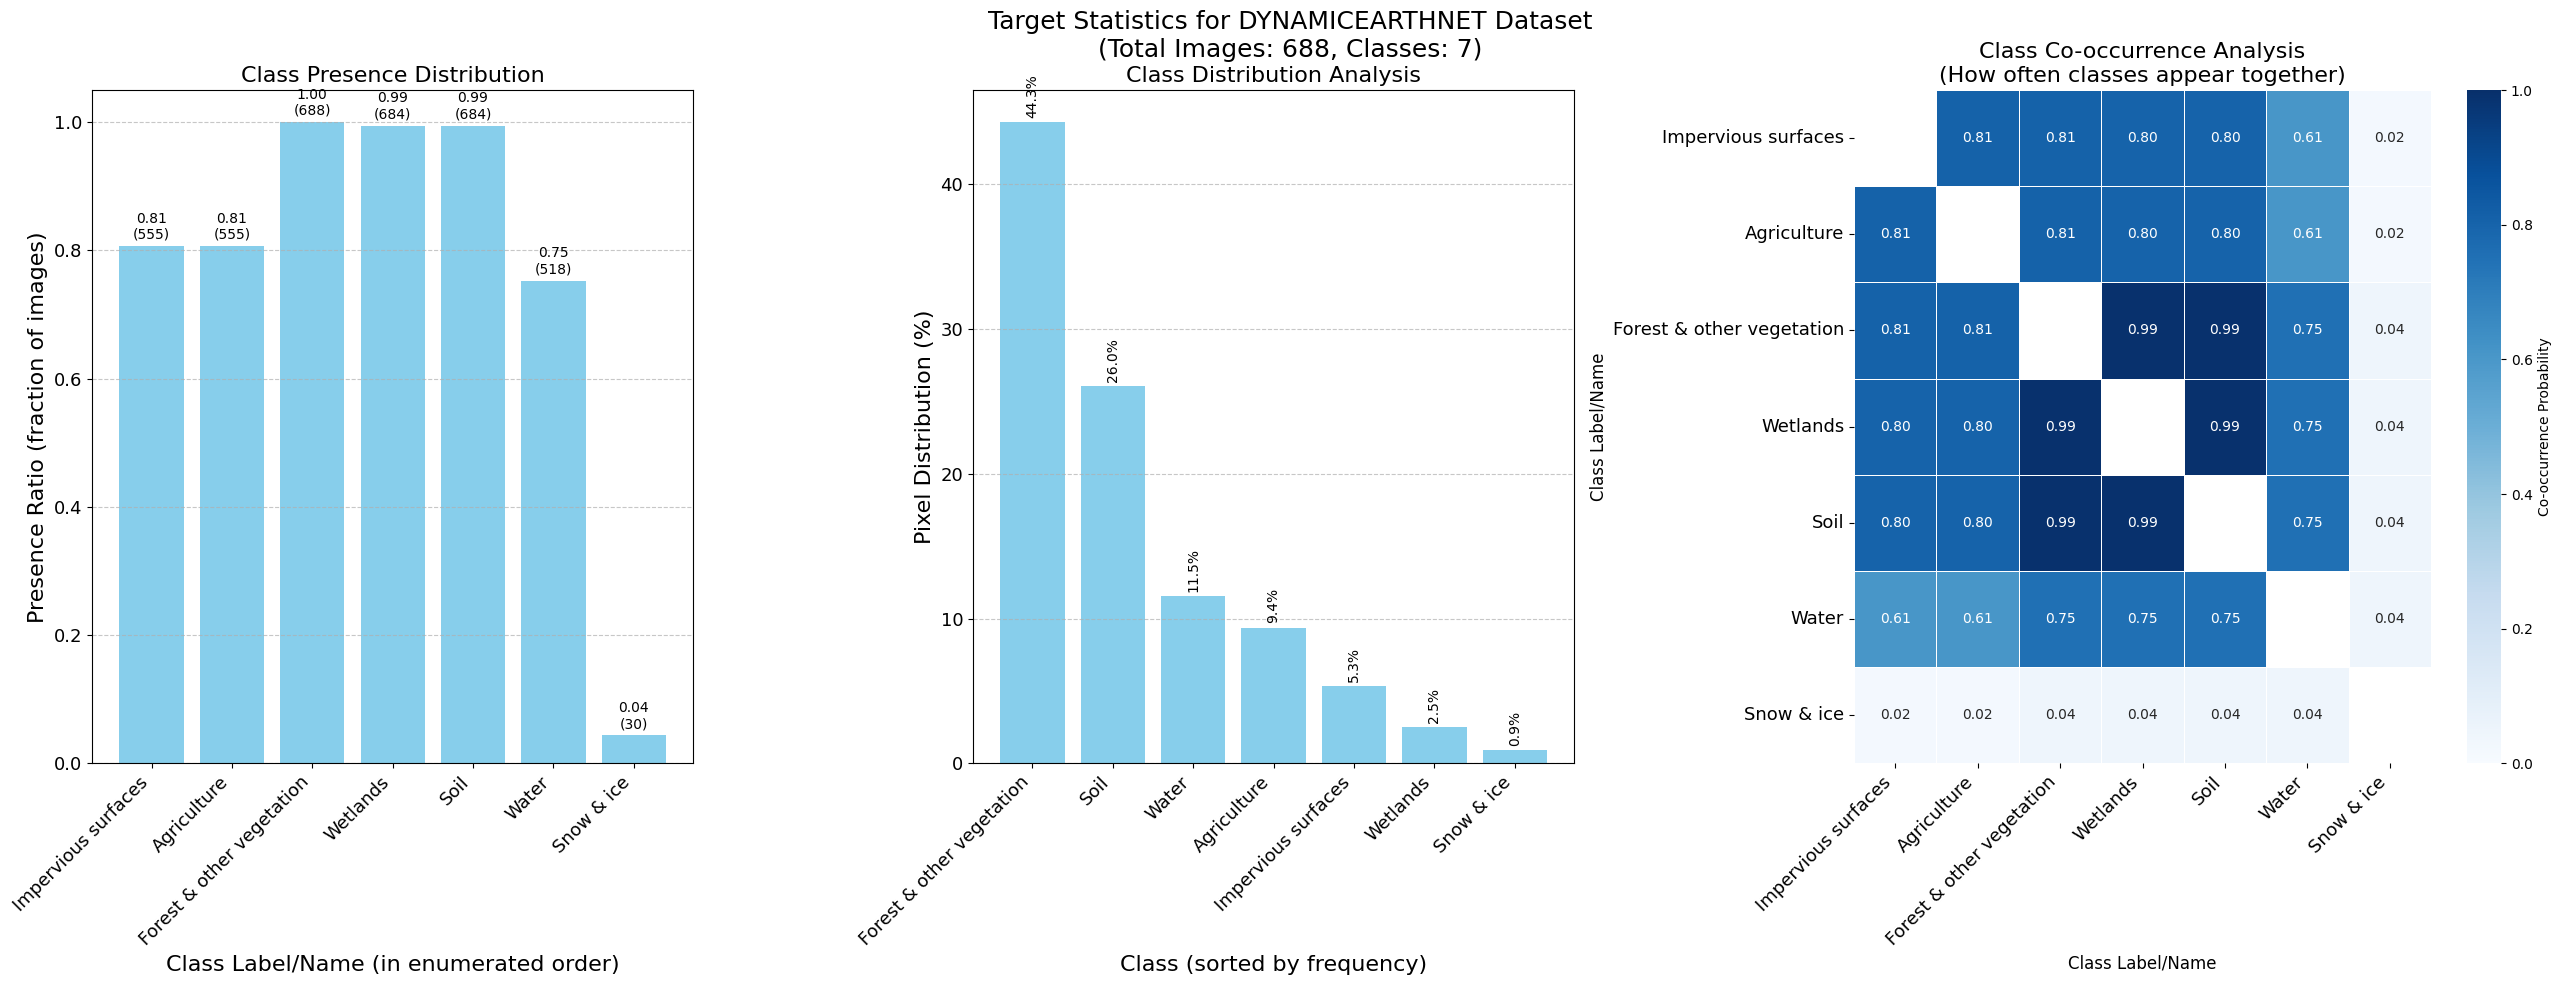

In [6]:
fig = visualize_segmentation_target_statistics(
    PROJECT_ROOT / "dynamic_earthnet_stats_satmae.json", "DynamicEarthNet"
)

### Raw Batch Statistics

[<Figure size 1200x500 with 1 Axes>]

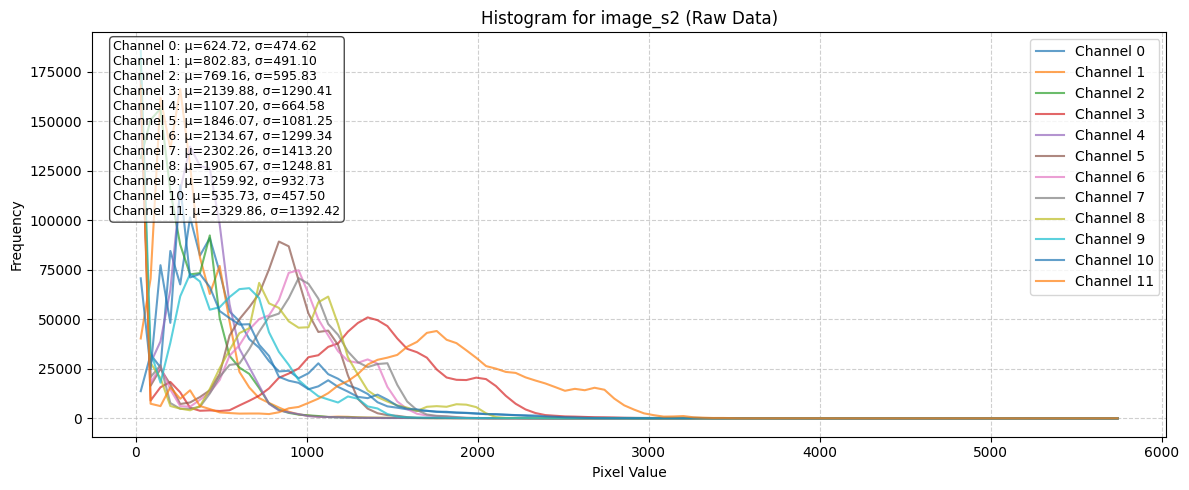

In [7]:
# Get a batch of data from the dataloader
train_dataloader = datamodule.train_dataloader()
raw_batch = next(iter(train_dataloader))

raw_batch_stats = compute_batch_histograms(raw_batch, n_bins=100)


raw_figs = plot_batch_histograms(
    raw_batch_stats, band_order, title_suffix=" (Raw Data)"
)
raw_figs

### Effect of Normalization Schemes

In [8]:
direct_stats_path = os.path.join(
    PROJECT_ROOT, "dynamic_earthnet_stats_clip_rescale.json"
)
satmae_stats_path = os.path.join(PROJECT_ROOT, "dynamic_earthnet_stats_satmae.json")


clip_z_normalizer = ZScoreNormalizer(direct_stats_path, band_order)
satmae_normalizer = SatMAENormalizer(satmae_stats_path, band_order)

### Effect of SatMAE Normalization scheme on batch

[<Figure size 1200x500 with 1 Axes>]

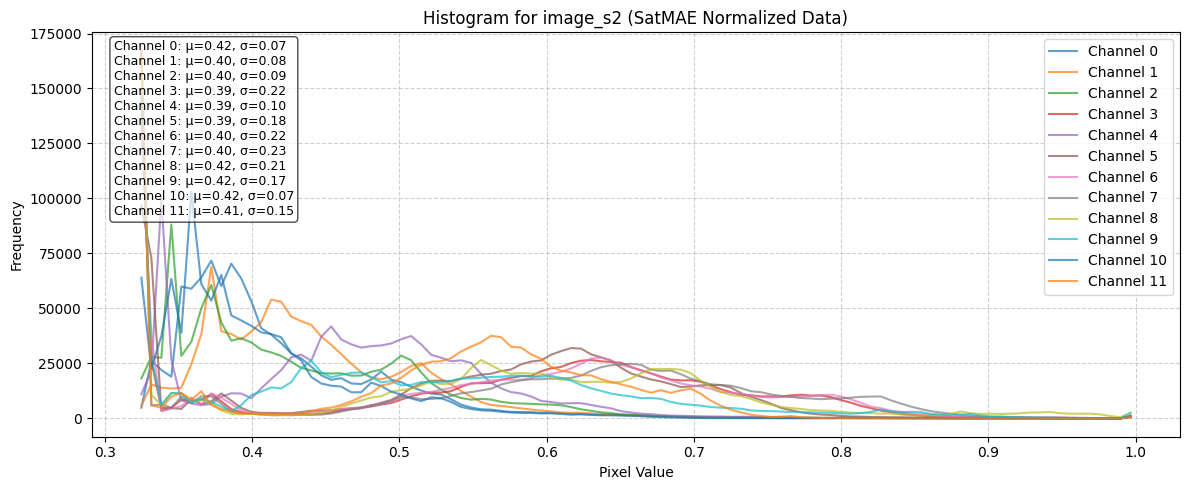

In [9]:
satmae_normalized_batch = satmae_normalizer(raw_batch)
satmae_batch_stats = compute_batch_histograms(satmae_normalized_batch, n_bins=100)
sat_mae_norm_fig = plot_batch_histograms(
    satmae_batch_stats, band_order, title_suffix=" (SatMAE Normalized Data)"
)
sat_mae_norm_fig

### Effect of ClipZ Normalization scheme on batch

[<Figure size 1200x500 with 1 Axes>]

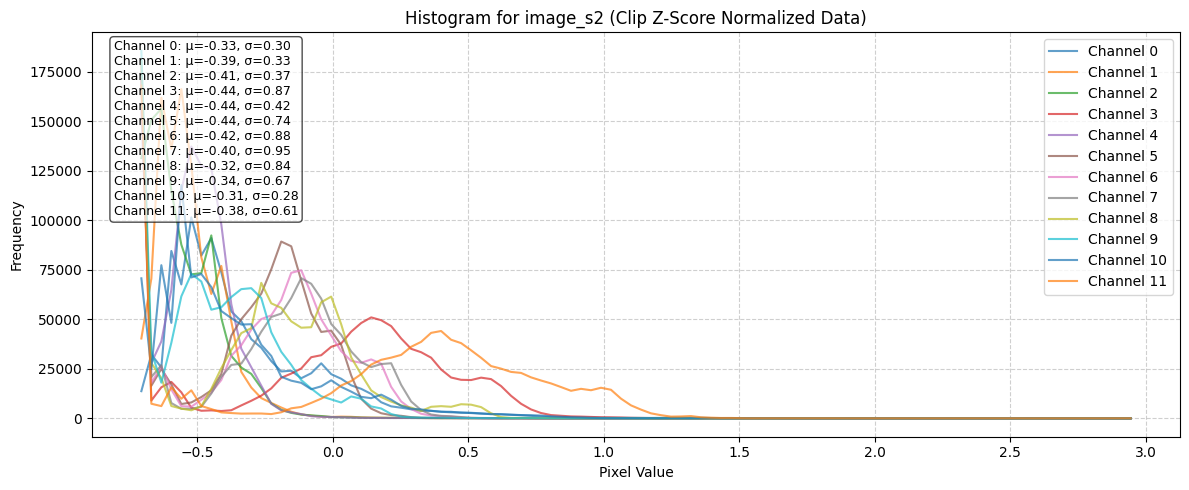

In [10]:
clip_z_normalized_batch = clip_z_normalizer(raw_batch)
clip_z_batch_stats = compute_batch_histograms(clip_z_normalized_batch, n_bins=100)
clip_z_norm_fig = plot_batch_histograms(
    clip_z_batch_stats, band_order, title_suffix=" (Clip Z-Score Normalized Data)"
)
clip_z_norm_fig

## Visualize Batch Data

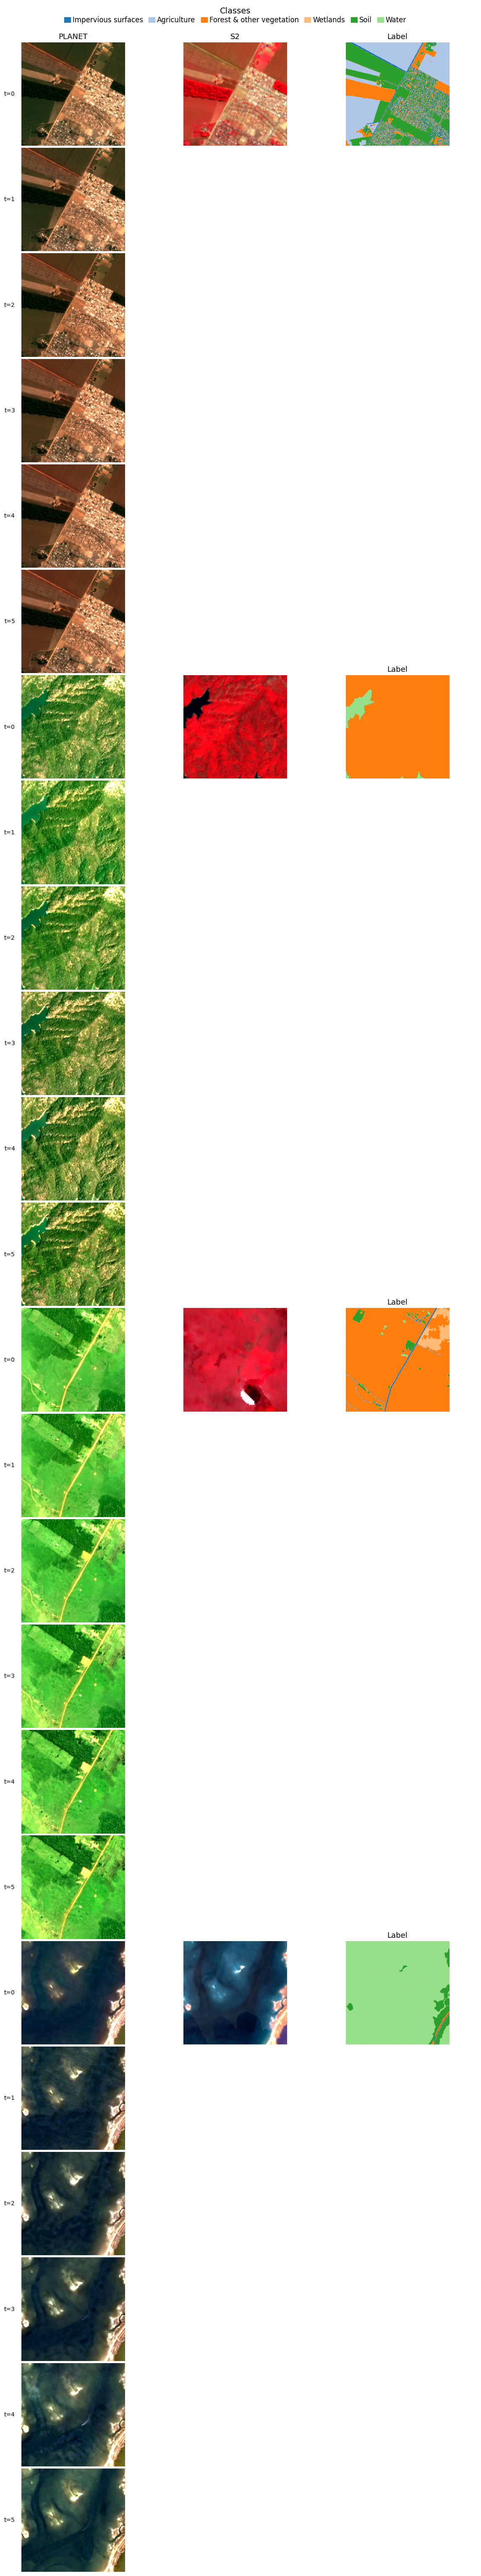

In [11]:
fig, batch = datamodule.visualize_batch()